<a href="https://colab.research.google.com/github/frankyehtw/hello-world/blob/master/%E3%80%8CUntitled34_ipynb%E3%80%8D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()      # 上傳檔案到 Colab
!ls  

Saving GOOG_Stock_Price_Train.csv to GOOG_Stock_Price_Train.csv
Saving GOOG_Stock_Price_Test.csv to GOOG_Stock_Price_Test.csv
GOOG_Stock_Price_Test.csv  GOOG_Stock_Price_Train.csv  sample_data


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
np.random.seed(10)  # 指定亂數種子
# 載入Google股價的訓練資料集
df_train = pd.read_csv("GOOG_Stock_Price_Train.csv",
                       index_col="Date",parse_dates=True)
X_train_set = df_train.iloc[:,4:5].values  # Adj Close欄位
# 特徵標準化 - 正規化
sc = MinMaxScaler() 
X_train_set = sc.fit_transform(X_train_set)
# 取出幾天前股價來建立成特徵和標籤資料集
def create_dataset(ds, look_back=1):
    X_data, Y_data = [],[]
    for i in range(len(ds)-look_back):
        X_data.append(ds[i:(i+look_back), 0])
        Y_data.append(ds[i+look_back, 0])
    
    return np.array(X_data), np.array(Y_data)
look_back = 60
print("回看天數:", look_back)
# 分割成特徵資料和標籤資料
X_train, Y_train = create_dataset(X_train_set, look_back)
# 轉換成(樣本數, 時步, 特徵)張量
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print("X_train.shape: ", X_train.shape)
print("Y_train.shape: ", Y_train.shape)
# 定義模型
model = Sequential()
model.add(LSTM(50, return_sequences=True, 
               input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(1))
model.summary()   # 顯示模型摘要資訊


回看天數: 60
X_train.shape:  (1198, 60, 1)
Y_train.shape:  (1198,)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 50)            10400     
_________________________________________________________________
dropout (Dropout)            (None, 60, 50)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
___________________________________________________________

Epoch 1/100
38/38 [==============================] - 8s 81ms/step - loss: 0.1035
Epoch 2/100
38/38 [==============================] - 3s 83ms/step - loss: 0.0067
Epoch 3/100
38/38 [==============================] - 3s 83ms/step - loss: 0.0052
Epoch 4/100
38/38 [==============================] - 3s 84ms/step - loss: 0.0052
Epoch 5/100
38/38 [==============================] - 3s 84ms/step - loss: 0.0046
Epoch 6/100
38/38 [==============================] - 3s 87ms/step - loss: 0.0048
Epoch 7/100
38/38 [==============================] - 3s 86ms/step - loss: 0.0038
Epoch 8/100
38/38 [==============================] - 3s 85ms/step - loss: 0.0037
Epoch 9/100
38/38 [==============================] - 3s 85ms/step - loss: 0.0040
Epoch 10/100
38/38 [==============================] - 3s 84ms/step - loss: 0.0038
Epoch 11/100
38/38 [==============================] - 3s 85ms/step - loss: 0.0038
Epoch 12/100
38/38 [==============================] - 3s 85ms/step - loss: 0.0031
Epoch 13/100
38/38 [=====

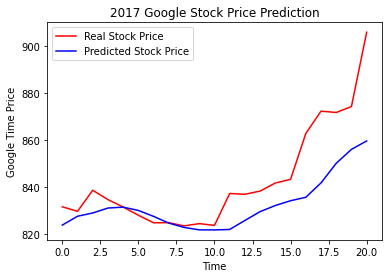

In [ ]:
# 編譯模型
model.compile(loss="mse", optimizer="adam")
# 訓練模型
model.fit(X_train, Y_train, epochs=100, batch_size=32)
# 使用模型預測股價 - 2017年1~3月預測 4 月份股價
df_test = pd.read_csv("GOOG_Stock_Price_Test.csv")
X_test_set = df_test.iloc[:,4:5].values
# 產生特徵資料和標籤資料
X_test, Y_test = create_dataset(X_test_set, look_back)
X_test = sc.transform(X_test)
# 轉換成(樣本數, 時步, 特徵)張量
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_test_pred = model.predict(X_test)
# 將預測值轉換回股價
X_test_pred_price = sc.inverse_transform(X_test_pred)
# 繪出股價圖表
import matplotlib.pyplot as plt
plt.plot(Y_test, color="red", label="Real Stock Price")
plt.plot(X_test_pred_price, color="blue", label="Predicted Stock Price")
plt.title("2017 Google Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Google Time Price")
plt.legend()
plt.show()
